#  Final Project

IBM HR Analytics Employee Attrition & Performance 

Jiajun Zhou 05/28/2020

Data Source: IBM HR Analytics Employee Attrition & Performance
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

## Table of contents
1. [Data Description](#description)
2. [Data Preparation](#datapreparation)
3. [Explory Data Analysis](#eda)
4. [Feature Engineering](#featureengineer)
5. [Classfication Models](#classficationmodel)
6. [Limitation and Conclusion](#limitation)

In [2]:
## Library loaded
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
import seaborn as sns
# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve, log_loss
SEED = 42

In [3]:
# Data Access
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')  
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


##  1. Data Description <a name="description"></a>

This dataset is a fictional dataset created by IBM data scientists. It records each employee's profile on personal, salary and employment information. The goal of this project is to identify the factors that retain talented employees and those which prompt them to leave. It adopts the machine learning to predict employee attrition and understand how these factors that lead to employee attrition.

In [4]:
df. shape

(1470, 35)

There are 1470 obesrvations of 35
variables in this dataset. I divided these variables into 6 sections and the complete description of the features considered in this dataset are:

**Target Varibles**

| Name | Descrption|   
|:---|:---|
| Attrition | Yes/No |

**Basic profile**

| Name | Descrption|   
|:---|:---|
| EmployeeNumber | ID number |
| EmployeeCount | Numerical Value, all entries are 1 |
| Department | Human Resources, Research & Development, Sales|
| JobLevel | 1-5, 5 levels | 
| JobRole | Sales Executive, Research Scientist, Laboratory Technician, Manufacturing Director, Healthcare Representative, Manager, Sales Representative, Research Director,Human Resources |  

**Employment history**

| Name | Descrption|   
|:---|:---|
| YearsAtCompany | Numerical Value, 0-40 years |
| YearsInCurrentRole  | Numerical Value, 0-18 years |
| YearsWithCurrManager | Numerical Value, 0-17 years |
| YearsSinceLastPromotion | Numerical Value, 0-15 years |
| TotalWorkingYears | Numerical Value, 0-40 years |
| NumCompaniesWorked | Numerical Value, 0-9 companies | 

**Work Experience**

| Name | Descrption|   
|:---|:---|
| BusinessTravel | Non-travel,Travel_Frequently,Travel_Rarely |
| TrainingTimesLastYear |  Numerical Value, 0-6 times  |
| StandardHours | Numerical Value, all entries are 80 |
| OverTime | Yes, No |
| PerformanceRating |1 'Low', 2 'Good', 3 'Excellent', 4 'Outstanding' |
| EnvironmentSatisfaction | 1 'Low', 2 'Medium', 3='High', 4 'Very High' |
| RelationshipSatisfaction | 1='Low'/2='Medium'/3='High'/4='Very High'|
| JobInvolvement | 1 'Low', 2 'Medium', 3='High', 4 'Very High' |
| JobSatisfaction | 1 'Low', 2 'Medium', 3='High', 4 'Very High' |

**Salary**

| Variables | Descrption|   
|:---|:---|
| HourlyRate | Numerical Value, 30-60 |   
| DailyRate | Numerical Value, 102-1499 |
| MonthlyIncome | Numerical Value, 1009-19999 |  
| MonthlyRate | Numerical Value, 2094-26999 |
| PercentSalaryHike | Numerical Value, 11-25% |   
| StockOptionLevel | 0-3, 4 levels |

**Background and life**

| Variables | Descrption|   
|:---|:---|
| Age |  Numerical Value, 18-60 |
| Over18 | 1 level, all Yes |  
| Gender | Female/Male |
| MaritalStatus | Divorced/Married/Single | 
| Education | 1='Below College'/2='College'/3='Bachelor'/4='Master'/5='Doctor'|
| EducationField | Human Resource/Life Scienceses/Marketing/Medical/Other/Technical Degree  |
| WorkLifeBalance | 1='Bad'/2='Good'/3='Better'/4='Best'|
| DistanceFromHome| Numerical Value, 1-29 |

##  2. Data Preparation <a name="datapreparation"></a>

#### Check missing values

In [5]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

 The above results show that there is no missing value in each column and the dataset is quite clean.

#### Descriptive statistics

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [7]:
df.describe(include=[np.object]).transpose()

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


 1. EmployeeNumber is useful to identify the employee but useless for feautures to build the models.
 2. The variable 'EmployeeCount', 'over 18' and 'StandardHours' columns will be removed because all entries are the same. 

#### Define the level of  'JobLevel' 

In [8]:
for level in df['JobLevel'].unique():
    print('\n', level, ':', len(df[df['JobLevel']==level]) )
    print(df[df['JobLevel']==level]['JobRole'].value_counts())


 2 : 534
Sales Executive              233
Manufacturing Director        90
Healthcare Representative     78
Research Scientist            57
Laboratory Technician         56
Human Resources               13
Sales Representative           7
Name: JobRole, dtype: int64

 1 : 543
Research Scientist       234
Laboratory Technician    200
Sales Representative      76
Human Resources           33
Name: JobRole, dtype: int64

 3 : 218
Sales Executive              79
Manufacturing Director       45
Healthcare Representative    44
Research Director            28
Manager                      12
Human Resources               6
Laboratory Technician         3
Research Scientist            1
Name: JobRole, dtype: int64

 4 : 106
Manager                      47
Research Director            26
Sales Executive              14
Manufacturing Director       10
Healthcare Representative     9
Name: JobRole, dtype: int64

 5 : 69
Manager              43
Research Director    26
Name: JobRole, dtype: int64


From the above results, the higher job level corresponding the more responsibility and higner expectations of job roles. 

In [9]:
for stock in df['StockOptionLevel'].unique():
    print('\n', stock, ':', len(df[df['StockOptionLevel']==stock]) )
    print(df[df['StockOptionLevel']==stock]['JobLevel'].value_counts())


 0 : 631
1    257
2    219
3     86
4     43
5     26
Name: JobLevel, dtype: int64

 1 : 596
2    207
1    206
3     97
4     49
5     37
Name: JobLevel, dtype: int64

 3 : 85
1    39
2    25
3    13
4     6
5     2
Name: JobLevel, dtype: int64

 2 : 158
2    83
1    41
3    22
4     8
5     4
Name: JobLevel, dtype: int64


Since the most employees don't have the stock options, we could define the level 0 as 'No stock option.'

#### Add the feature to determine whether the job role is related to education filed.

In [10]:
for dpmt in df['Department'].unique():
    print('\n', dpmt, ':', len(df[df['Department']==dpmt]))
    print(df[df['Department']==dpmt]['EducationField'].value_counts())


 Sales : 446
Marketing           159
Life Sciences       150
Medical              88
Technical Degree     34
Other                15
Name: EducationField, dtype: int64

 Research & Development : 961
Life Sciences       440
Medical             363
Technical Degree     94
Other                64
Name: EducationField, dtype: int64

 Human Resources : 63
Human Resources     27
Life Sciences       16
Medical             13
Technical Degree     4
Other                3
Name: EducationField, dtype: int64


In [11]:
df['EduRelated'] = 0
for i, row in df.iterrows():
    if row['EducationField']=='Human Resources' and row['Department']=='Human Resources':
        df['EduRelated'][i] = 1
    elif row['EducationField']=='Life Sciences' and row['Department']=='Research & Development':
        df['EduRelated'][i] = 1
    elif row['EducationField']=='Medical' and row['Department']=='Research & Development':
        df['EduRelated'][i] = 1
    elif row['EducationField']=='Marketing' and row['Department']=='Sales':
        df['EduRelated'][i] = 1

df. EduRelated. value_counts()

1    989
0    481
Name: EduRelated, dtype: int64

#### Add the feature to represent managing role

In [12]:
df['ManagingRole'] = 0
for i, row in df.iterrows():
    if row['JobRole']=='Manufacturing Director' :
        df['ManagingRole'][i] = 1
    elif row['JobRole']=='Manager' :
        df['ManagingRole'][i] = 1
    elif row['JobRole']=='Research Director' :
        df['ManagingRole'][i] = 1

df. ManagingRole. value_counts()

0    1143
1     327
Name: ManagingRole, dtype: int64

Thus, we can drop the 'JobRole' feature because eight levels make it diffcult to build the model.

#### Add the feature to represent total satisfaction of three kinds.

In [13]:
df['TotalSatisfaction']= df['JobSatisfaction'] +  df['EnvironmentSatisfaction'] + df['RelationshipSatisfaction']    
df.TotalSatisfaction.describe()

count    1470.000000
mean        8.162585
std         1.884721
min         3.000000
25%         7.000000
50%         8.000000
75%        10.000000
max        12.000000
Name: TotalSatisfaction, dtype: float64

## 3. Explory Data Analysis<a name="eda"></a>

### Proportion of Attrition

In [14]:
df.Attrition.value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

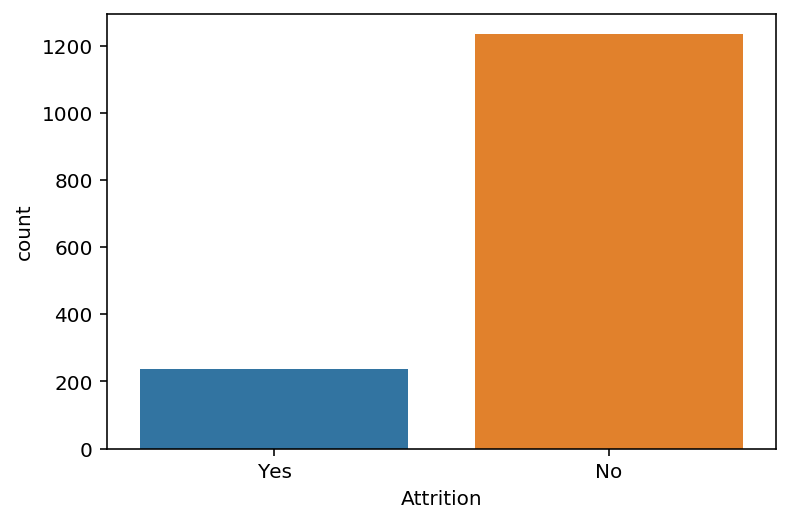

In [15]:
sns.countplot("Attrition",data=df)

The target variable is imbalance with 16.12% attrition rate.

### The distribution of basic profile section

#### The distribution of jobrole in each deparment

In [16]:
df['Attrition_ind'] = 0 
df.loc[df['Attrition'] =='Yes', 'Attrition_ind'] = 1

df.pivot_table(values='Attrition_ind', index='JobLevel', columns='Department')

Department,Human Resources,Research & Development,Sales
JobLevel,,,
1,0.303030,0.232719,0.421053
2,0.000000,0.053381,0.154167
3,0.333333,0.100775,0.204819
4,0.000000,0.014706,0.117647
5,0.000000,0.061224,0.153846


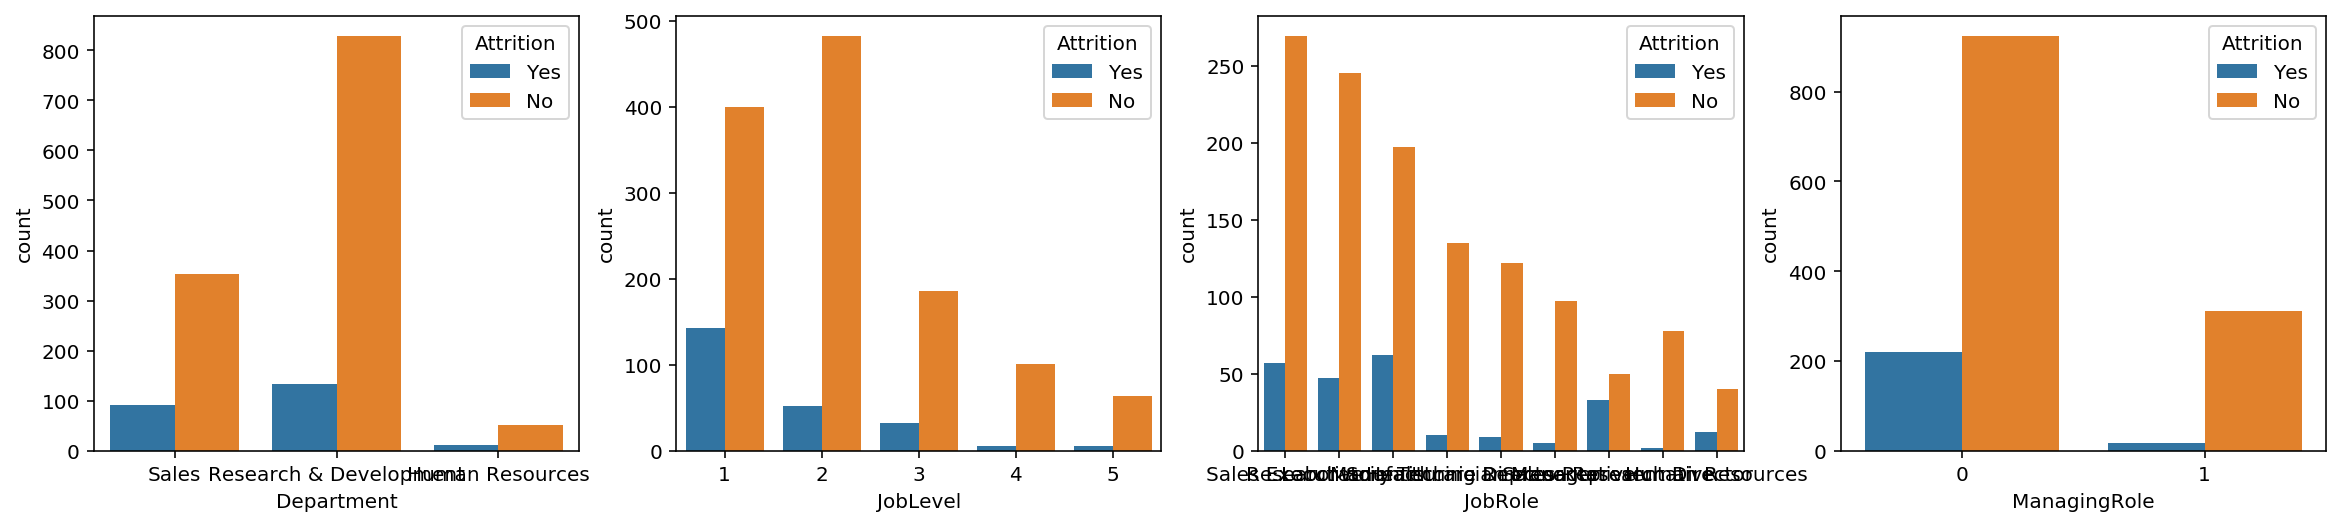

In [17]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1)
sns.countplot(x="Department", data=df,hue='Attrition')
plt.subplot(1, 4, 2)
sns.countplot(x="JobLevel", data=df,  hue='Attrition')
plt.subplot(1, 4, 3)
sns.countplot(x="JobRole", data=df,  hue='Attrition')
plt.subplot(1, 4, 4)
sns.countplot(x="ManagingRole", data=df,  hue='Attrition')

From the above table and plots, we could find:

1. The lower level emoplyees have higher rate of attrition, and mainly lies on level 1 
2. The sales deparement have the higest rate of attrition while the human resource have the lowest
3. The employee with managing role have lower rate of attriton. The new feature can be kept. 

### The distribution of employment history section

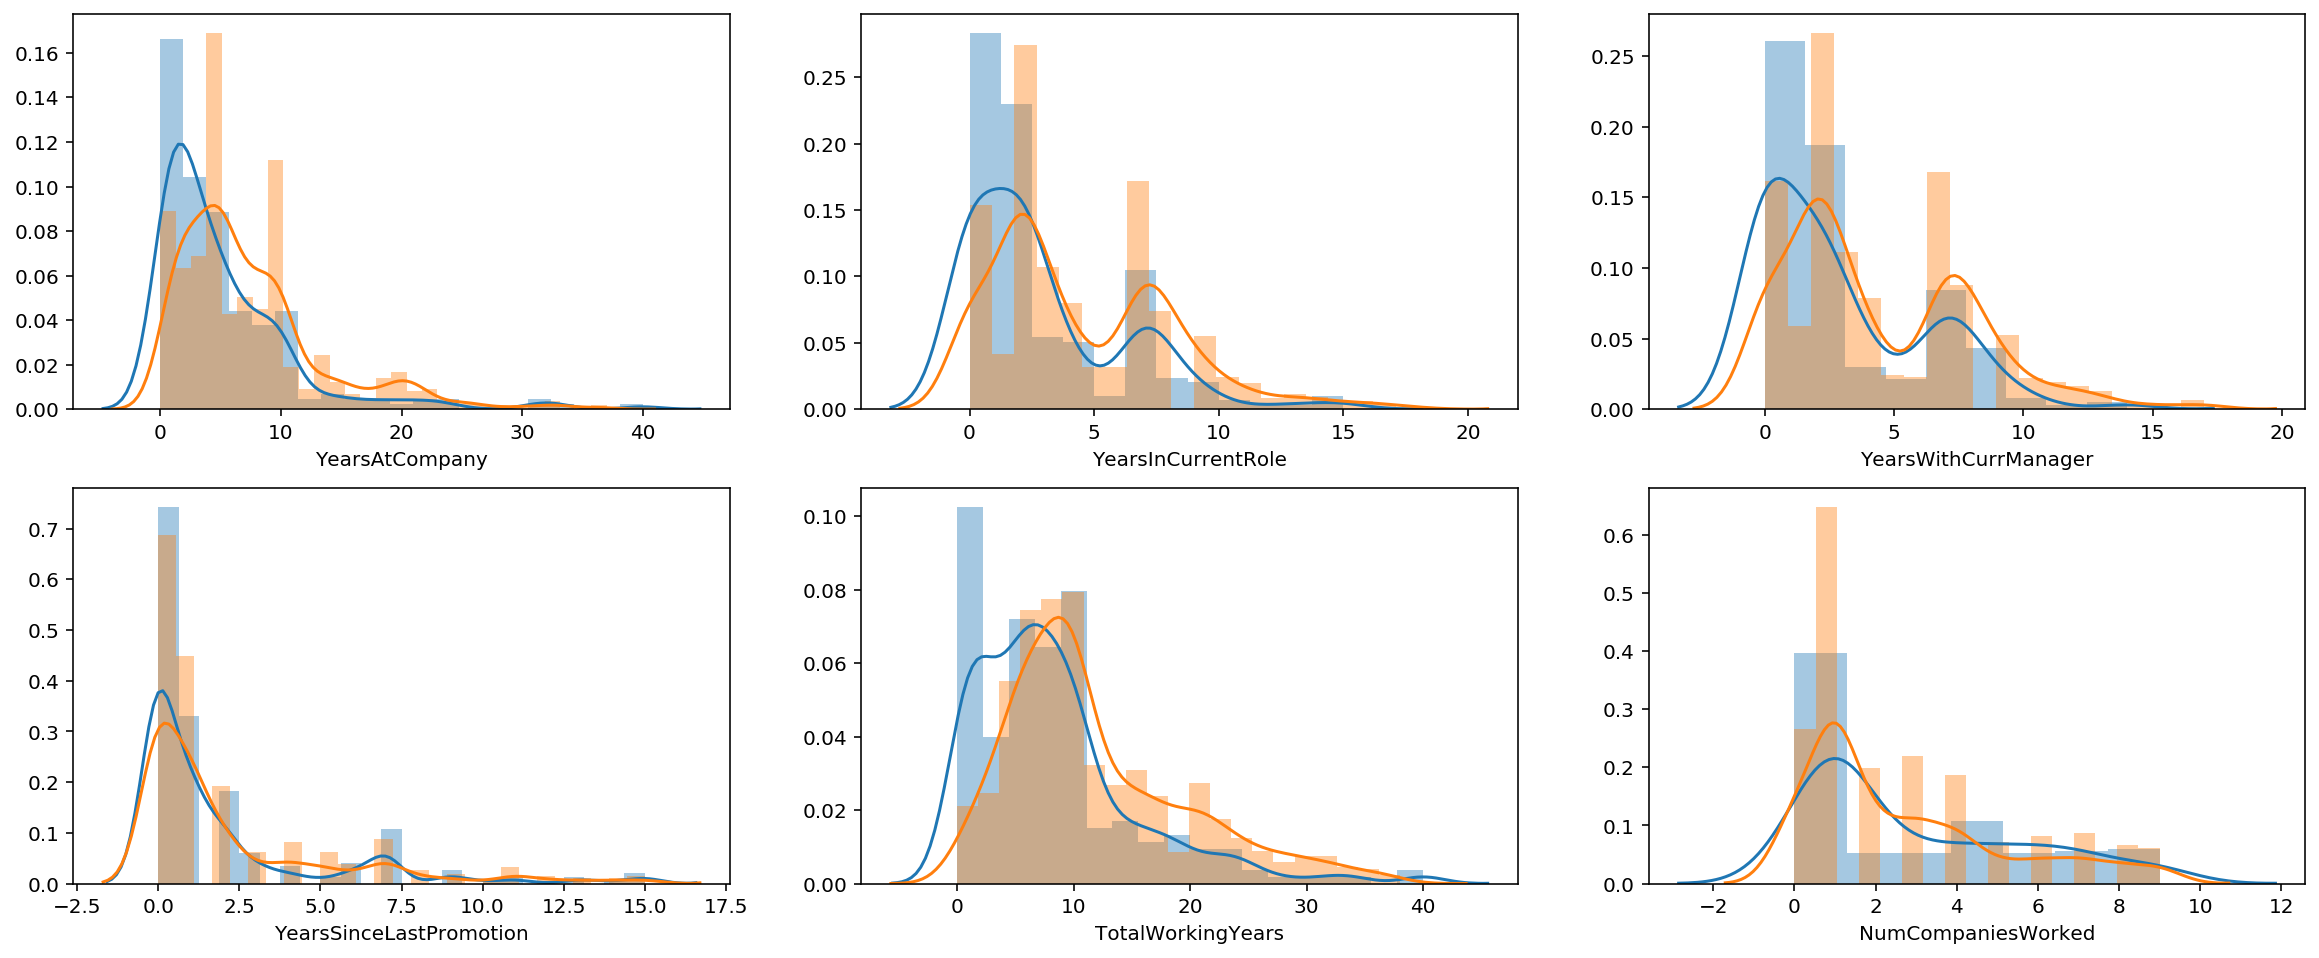

In [17]:
df_yes = df.loc[df['Attrition'] == 'Yes']
df_no = df.loc[df['Attrition'] == 'No']

plt.figure(figsize=(20, 8))
plt.subplot(2, 3, 1)
sns.distplot(df_yes["YearsAtCompany"])
sns.distplot(df_no["YearsAtCompany"])
plt.subplot(2, 3, 2)
sns.distplot(df_yes["YearsInCurrentRole"])
sns.distplot(df_no["YearsInCurrentRole"])
plt.subplot(2, 3, 3)
sns.distplot(df_yes["YearsWithCurrManager"])
sns.distplot(df_no["YearsWithCurrManager"])
plt.subplot(2, 3, 4)
sns.distplot(df_yes["YearsSinceLastPromotion"])
sns.distplot(df_no["YearsSinceLastPromotion"])
plt.subplot(2, 3, 5)
sns.distplot(df_yes["TotalWorkingYears"])
sns.distplot(df_no["TotalWorkingYears"])
plt.subplot(2, 3, 6)
sns.distplot(df_yes["NumCompaniesWorked"])
sns.distplot(df_no["NumCompaniesWorked"])

From the above plot, we could find

1. Employees who worked in more than 4 companies have higher attritute rates. 
2. Employees who have been in the company for less than 5 years have higher attritute rates.
3. The less years employees work, the higher attrityte rate is. 

### The distribution of work experience section

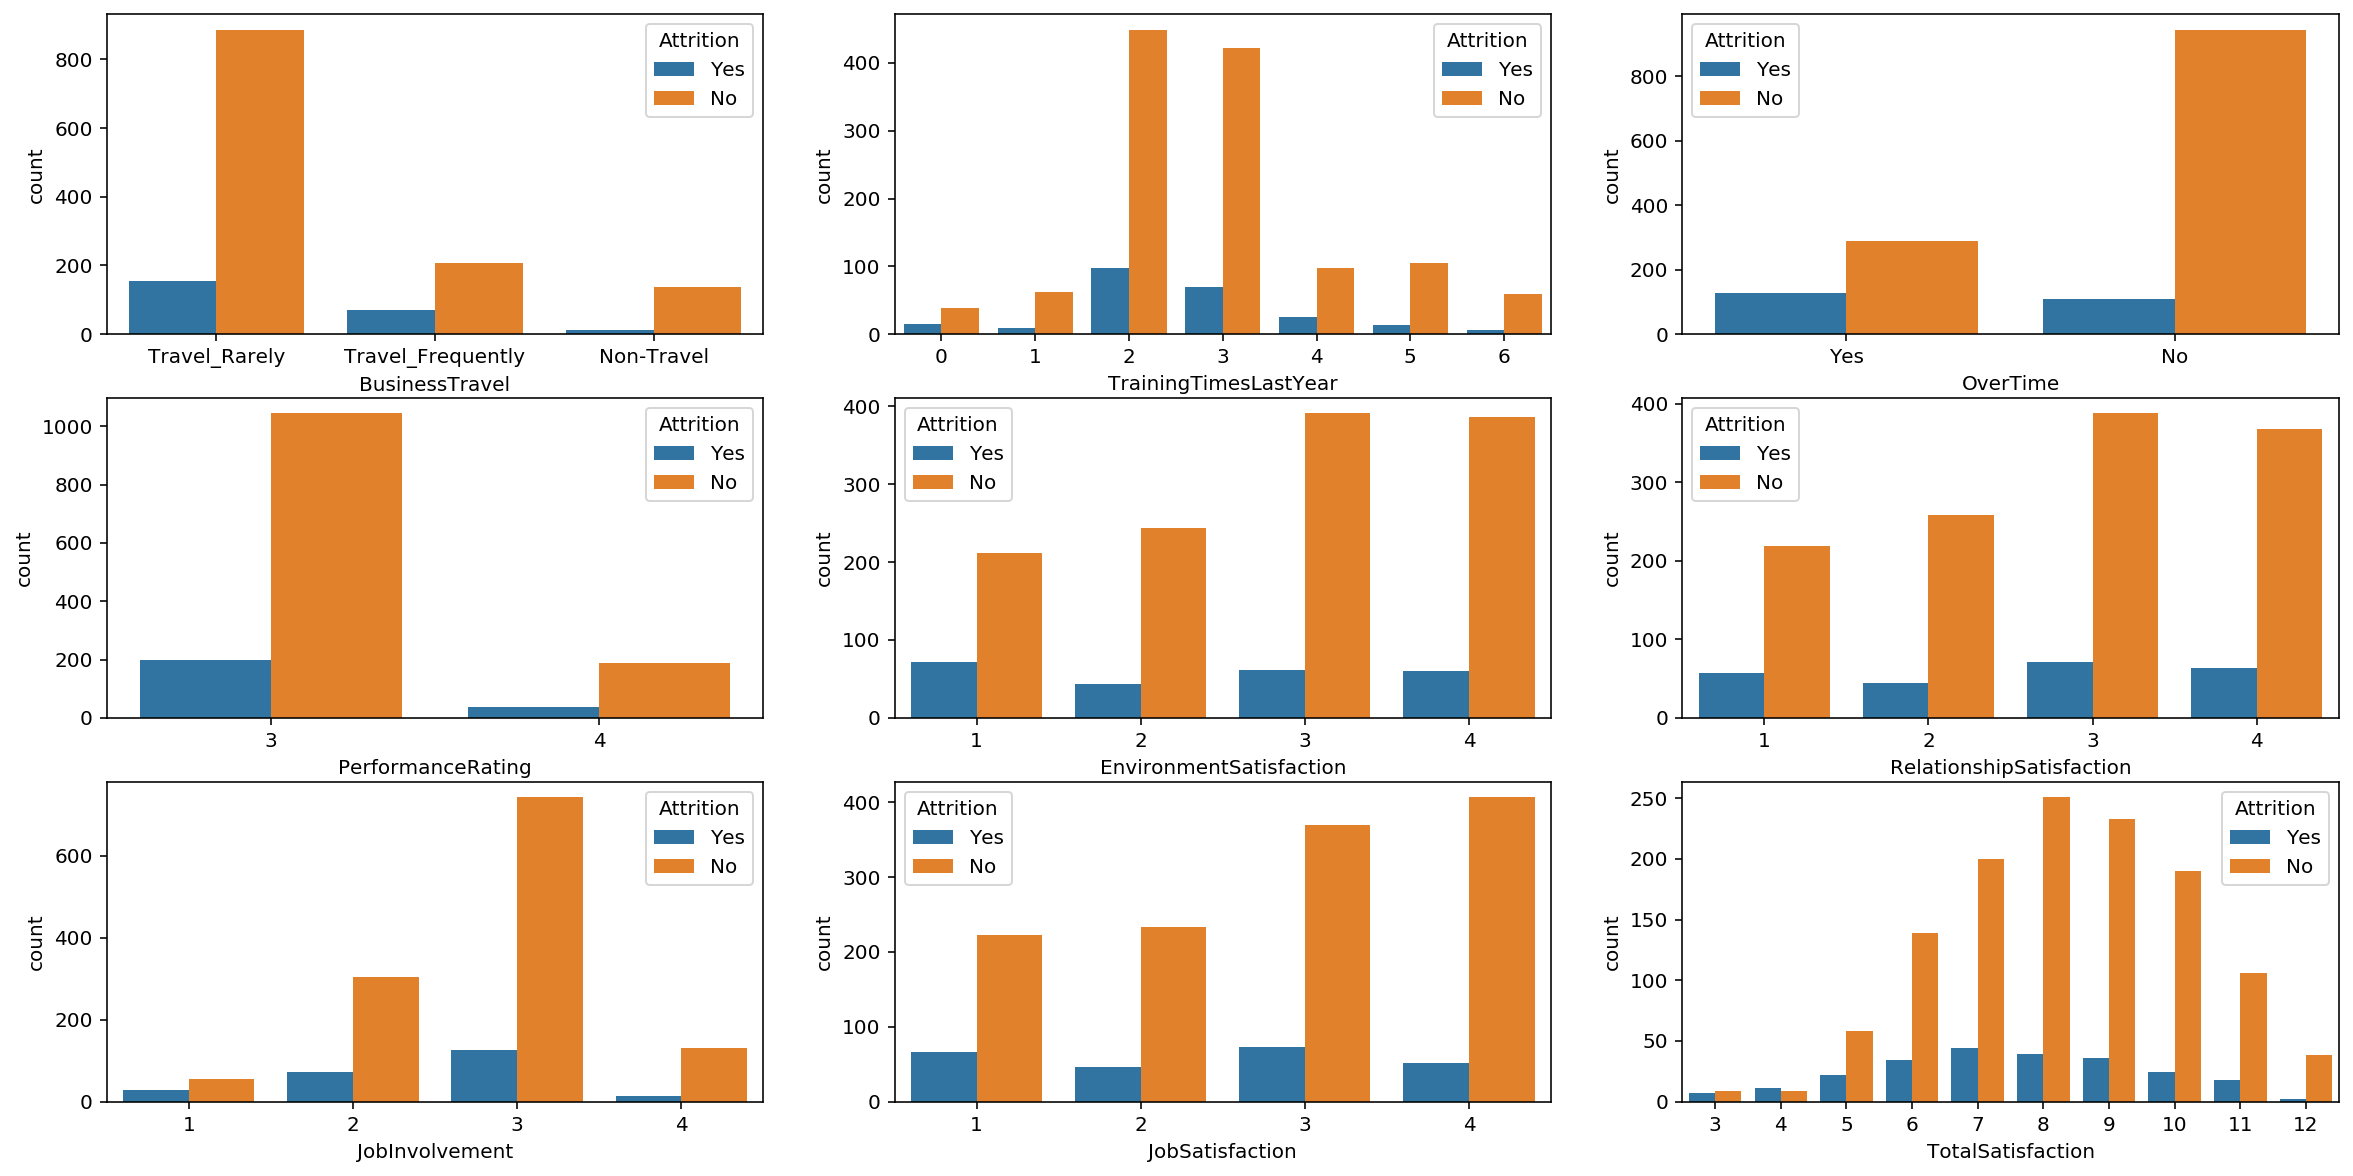

In [19]:
plt.figure(figsize=(20, 10))

plt.subplot(3, 3, 1)
sns.countplot(x="BusinessTravel", data=df,hue='Attrition')
plt.subplot(3, 3, 2)
sns.countplot(x="TrainingTimesLastYear", data=df,  hue='Attrition')
plt.subplot(3, 3, 3)
sns.countplot(x="OverTime", data=df,  hue='Attrition')
plt.subplot(3, 3, 4)
sns.countplot(x="PerformanceRating", data=df,  hue='Attrition')
plt.subplot(3, 3, 5)
sns.countplot(x="EnvironmentSatisfaction", data=df,  hue='Attrition')
plt.subplot(3, 3, 6)
sns.countplot(x="RelationshipSatisfaction", data=df,  hue='Attrition')
plt.subplot(3, 3, 7)
sns.countplot(x="JobInvolvement", data=df,  hue='Attrition')
plt.subplot(3, 3, 8)
sns.countplot(x="JobSatisfaction", data=df,  hue='Attrition')
plt.subplot(3, 3, 9)
sns.countplot(x="TotalSatisfaction", data=df,  hue='Attrition')


From the above plot, we could find

1. The employees who travel frequently have the highest attrition rate.

2. Overtime seems to be one of the key factors to attrition, as a larger proportion of overtime employees has departed.

3. The three kinds of satisfaction scores shows that low satifaction on job, enviroment and relationship is likely to leads to attritutuon

4. The distribution of total satisfation score is much closer to normal distribution, and it is more useful to build the model 

### The distribution of Salary section

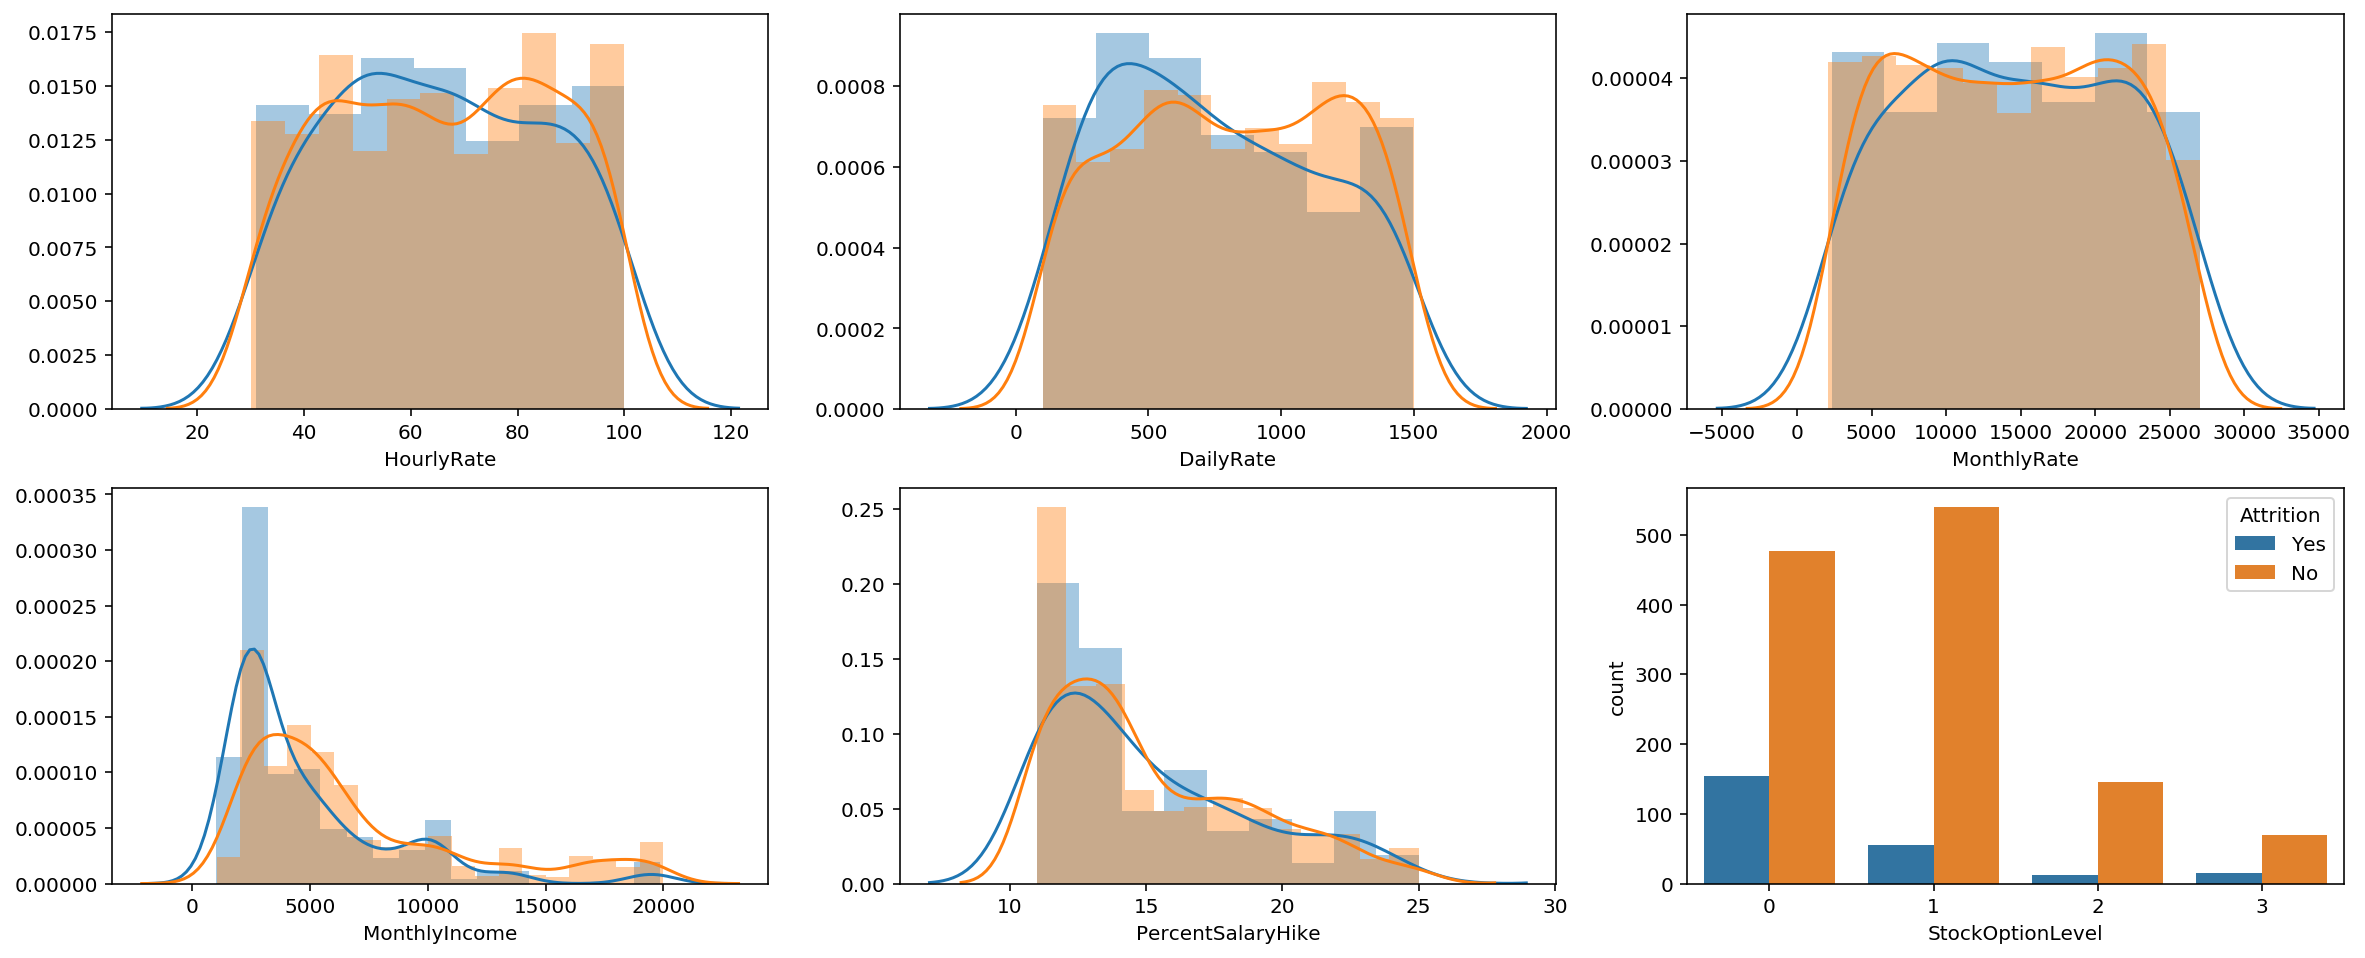

In [19]:
df_yes = df.loc[df['Attrition'] == 'Yes']
df_no = df.loc[df['Attrition'] == 'No']

plt.figure(figsize=(20, 8))
plt.subplot(2, 3, 1)
sns.distplot(df_yes["HourlyRate"])
sns.distplot(df_no["HourlyRate"])
plt.subplot(2, 3, 2)
sns.distplot(df_yes["DailyRate"])
sns.distplot(df_no["DailyRate"])
plt.subplot(2, 3, 3)
sns.distplot(df_yes["MonthlyRate"])
sns.distplot(df_no["MonthlyRate"])
plt.subplot(2, 3, 4)
sns.distplot(df_yes["MonthlyIncome"])
sns.distplot(df_no["MonthlyIncome"])
plt.subplot(2, 3, 5)
sns.distplot(df_yes["PercentSalaryHike"])
sns.distplot(df_no["PercentSalaryHike"])
plt.subplot(2, 3, 6)
sns.countplot("StockOptionLevel", data=df, hue='Attrition')

 1. It seems that HourlyRate, DailyRate and MonthlyRate are the unrelated variables.
 2. The employees with lower monthly income have higher rates of attrition, and the number of $100000 is a odd point becuase it has extremely higher rate of attrition
 3. The employees with no stock option has the highest attrition rate.

### The distribution of background section

In [20]:
df.pivot_table(values='Attrition_ind', index='MaritalStatus', columns='Gender')

Gender,Female,Male
MaritalStatus,,
Divorced,0.076923,0.114286
Married,0.113971,0.132170
Single,0.236181,0.269373


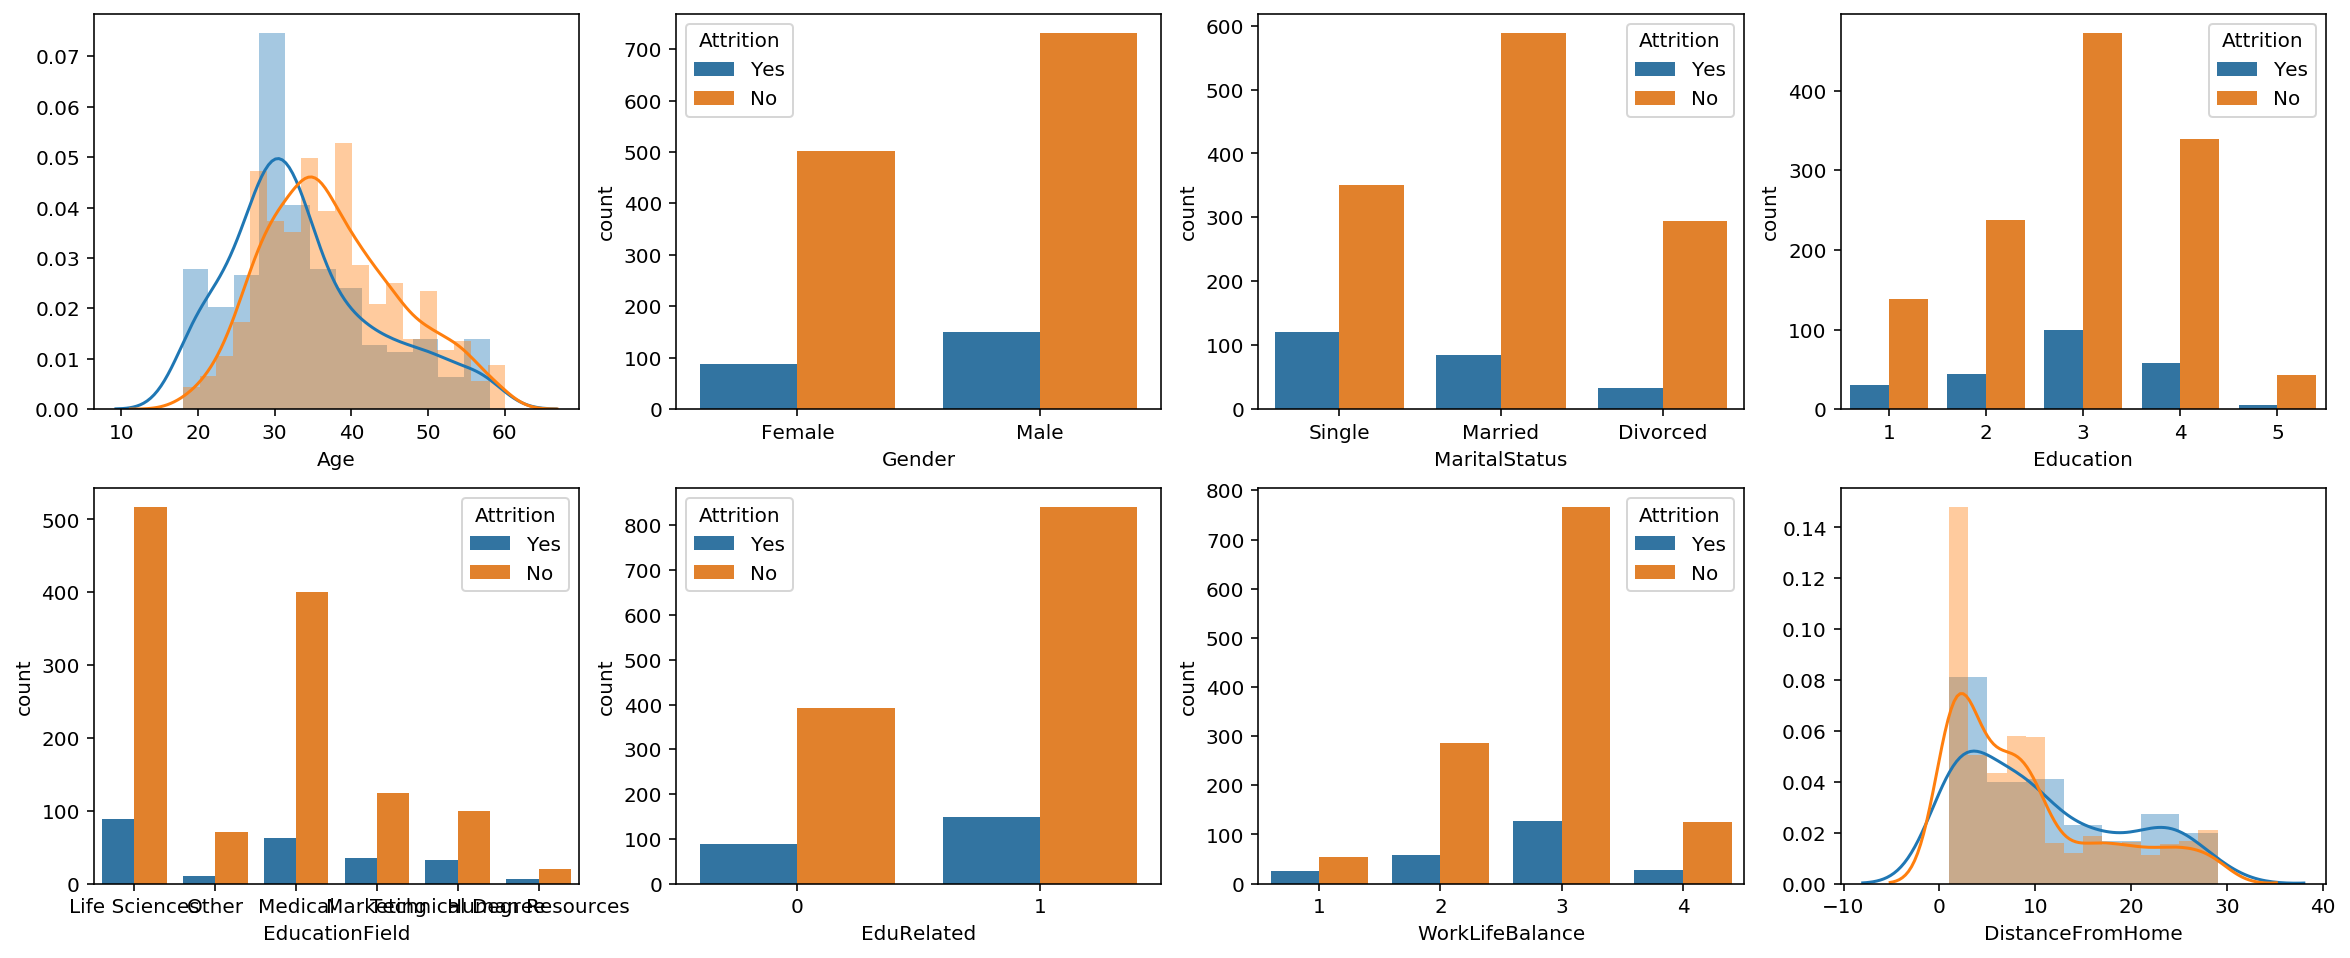

In [21]:
df_yes = df.loc[df['Attrition'] == 'Yes']
df_no = df.loc[df['Attrition'] == 'No']

plt.figure(figsize=(20, 8))
plt.subplot(2, 4, 1)
sns.distplot(df_yes["Age"])
sns.distplot(df_no["Age"])
plt.subplot(2, 4, 2)
sns.countplot("Gender", data=df, hue='Attrition')
plt.subplot(2, 4, 3)
sns.countplot("MaritalStatus", data=df, hue='Attrition')
plt.subplot(2, 4, 4)
sns.countplot("Education", data=df , hue='Attrition')
plt.subplot(2, 4, 5)
sns.countplot("EducationField", data=df, hue='Attrition')
plt.subplot(2, 4, 6)
sns.countplot("EduRelated", data=df, hue='Attrition')
plt.subplot(2, 4, 7)
sns.countplot("WorkLifeBalance", data=df, hue='Attrition')
plt.subplot(2, 4, 8)
sns.distplot(df_yes["DistanceFromHome"])
sns.distplot(df_no["DistanceFromHome"])

1. The employees who are smaller than 30 have a higher attrition rate
2. Employees who think that the work-life balance level is 1 have a higher turnover rate
3. High attrition rate of employees are far away from home

#### Other Findings

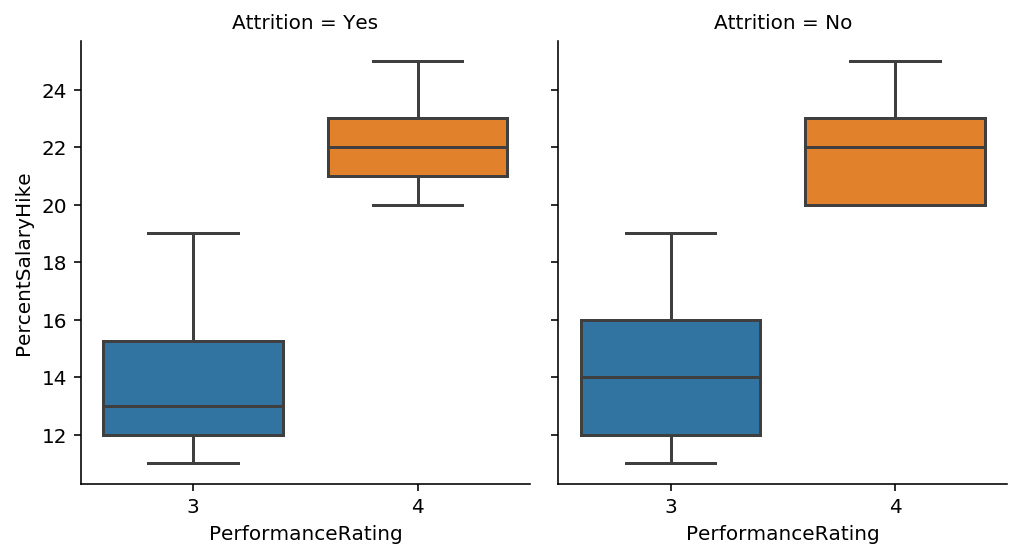

In [22]:
sns.catplot(x='PerformanceRating', y='PercentSalaryHike',
                 col="Attrition",
                data=df, kind="box",
                height=4, aspect=.9);

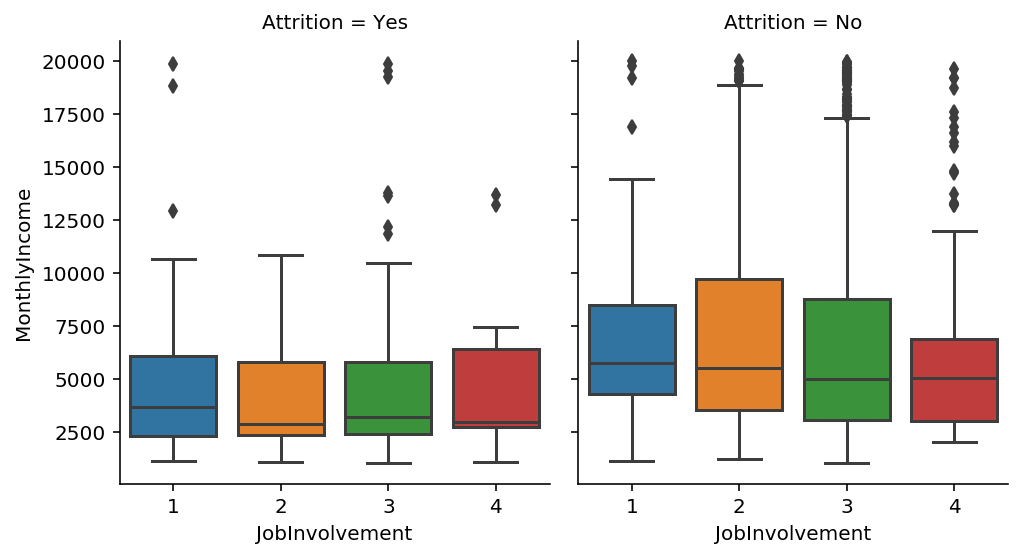

In [23]:
sns.catplot(x='JobInvolvement', y='MonthlyIncome',
                 col="Attrition",
                data=df, kind="box",
                height=4, aspect=.9);

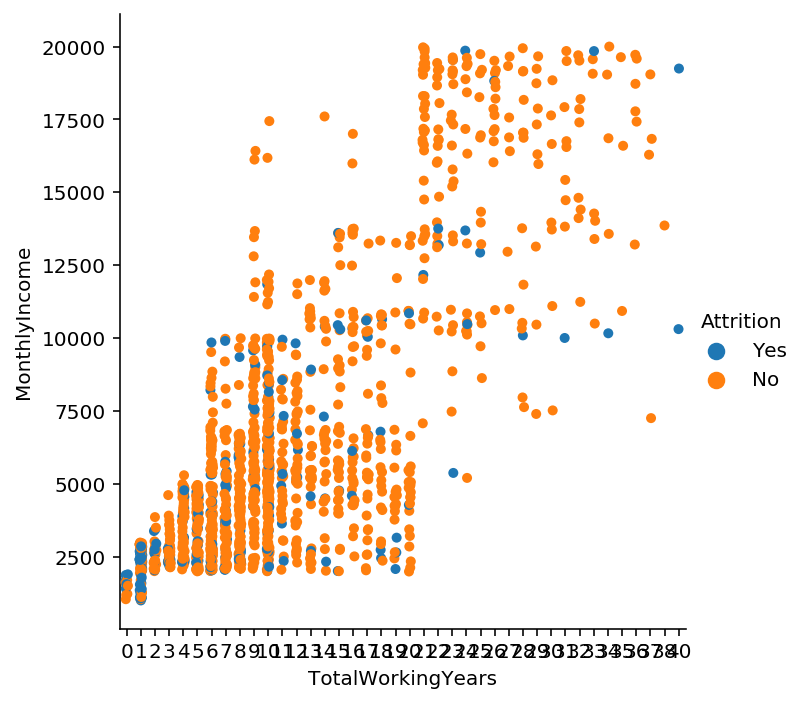

In [24]:
sns.catplot(x='TotalWorkingYears', y='MonthlyIncome',
                 hue="Attrition",
                data=df)

## 4. Feature Engineering <a name="featureengineer"></a>

In [18]:
df['Gender_ind'] = 0 
df.loc[df['Gender'] =='Male', 'Gender_ind'] = 1
df['OverTime_ind'] = 0 
df.loc[df['OverTime_ind'] =='Yes', 'OverTime_ind'] = 1
df_clean = df.drop(columns='Attrition', inplace=True)
df_clean = df.drop(columns='EducationField', inplace=True)
df_clean = df.drop(columns='EmployeeCount', inplace=True)
df_clean = df.drop(columns='EmployeeNumber', inplace=True)
df_clean = df.drop(columns='JobRole', inplace=True)
df_clean = df.drop(columns='Over18', inplace=True)
df_clean = df.drop(columns='StandardHours', inplace=True)
df_clean = df.drop(columns='Gender', inplace=True)
df_clean = df.drop(columns='OverTime', inplace=True)
df_clean = pd.get_dummies(df, columns=['BusinessTravel','Department','MaritalStatus'])

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 38 columns):
Age                                  1470 non-null int64
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyIncome                        1470 non-null int64
MonthlyRate                          1470 non-null int64
NumCompaniesWorked                   1470 non-null int64
PercentSalaryHike                    1470 non-null int64
PerformanceRating                    1470 non-null int64
RelationshipSatisfaction             1470 non-null int64
StockOptionLevel                     1

#### Use Radomforest Model to find the top 20 features

Top 20 Features: ['MonthlyIncome', 'TotalWorkingYears', 'Age', 'YearsAtCompany', 'JobLevel', 'YearsWithCurrManager', 'TotalSatisfaction', 'StockOptionLevel', 'MaritalStatus_Single', 'YearsInCurrentRole', 'EnvironmentSatisfaction', 'BusinessTravel_Travel_Frequently', 'JobInvolvement', 'MonthlyRate', 'DistanceFromHome', 'ManagingRole', 'DailyRate', 'NumCompaniesWorked', 'JobSatisfaction', 'HourlyRate']


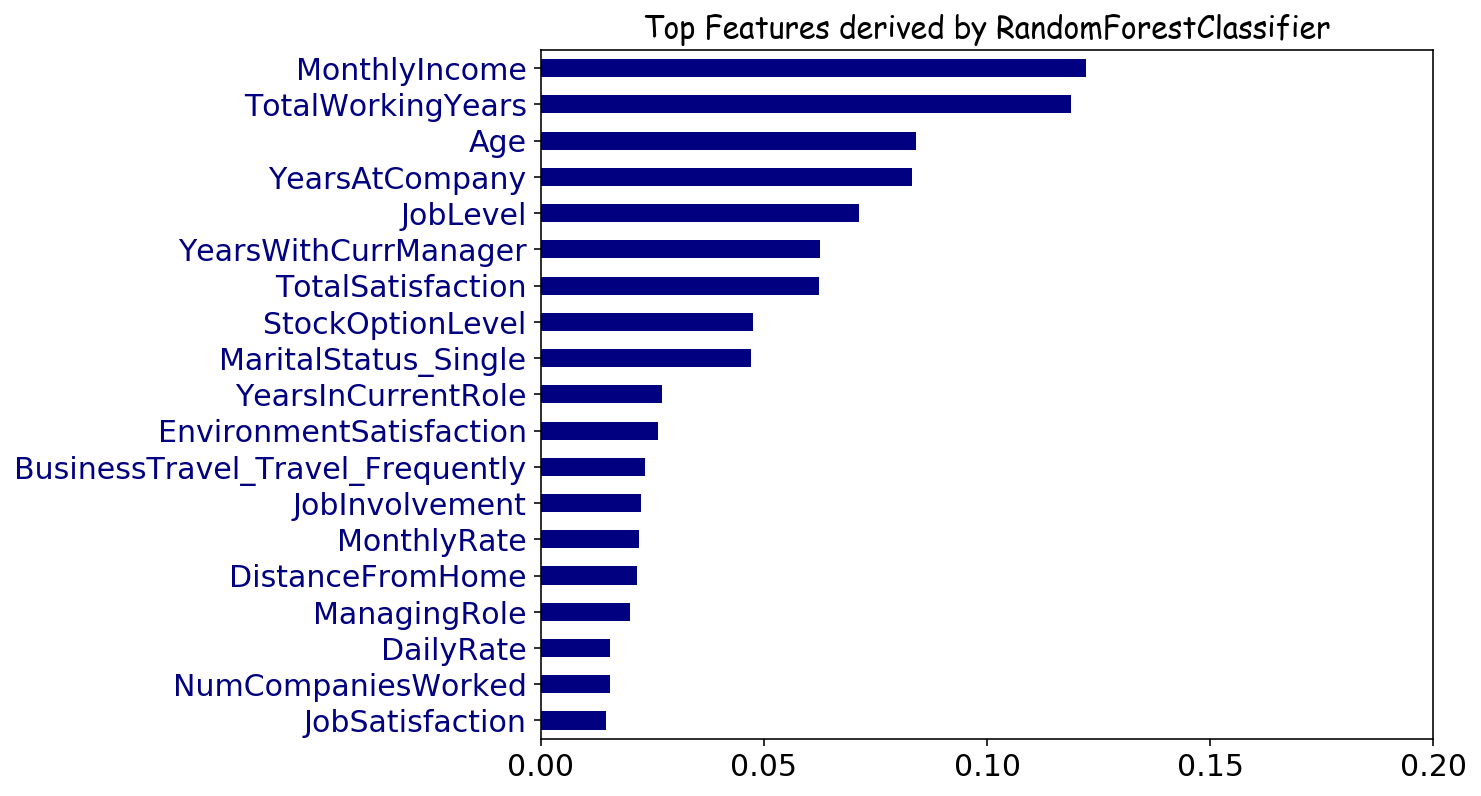

In [123]:
x, y = df_clean.drop('Attrition_ind', axis=1), df_clean['Attrition_ind']

# use RandomForestClassifier to look for important key features
n = 19    # specify n (top n features)
rfc = RandomForestClassifier(random_state=SEED, n_estimators=200, max_depth=3)
rfc_model = rfc.fit(x, y)
pd.Series(rfc_model.feature_importances_, index=x.columns).nlargest(n).plot(kind='barh', 
    figsize=[8, n/3], color='navy').invert_yaxis()    # most important feature is on top, ie, descending order
ticks_x = np.linspace(0, 0.2, 5)   # (start, end, number of ticks)
plt.xticks(ticks_x, fontsize=15, color='black')
plt.yticks(size=15, color='navy' )
plt.title('Top Features derived by RandomForestClassifier', family='fantasy', size=15)
top20_features = pd.Series(rfc_model.feature_importances_, index=x.columns).nlargest(20)
print('Top 20 Features:', list(top20_features.index))


The result is inteteresting and it shows that the monthly income is the key factors of attrition. It partly matches the reality.

## 5. Classfication Models<a name="classficationmodel"></a>

#### Split the data

As the dataset is imbalance, use “StratifiedKFold” in cross validation when training the models.

In [124]:
# define feature X and target y dataset (X and y are commonly used in sklearn)
x, y = df_clean.drop('Attrition_ind', axis=1), df['Attrition_ind']

# split data to 80:20 ratio for train/test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=SEED, stratify=y)
print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

# kf = KFold(n_splits=5, shuffle=True, random_state=SEED)   # this may result in imbalance classes in each fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)   # use this

x_train (1176, 37)
y_train (1176,)
x_test (294, 37)
y_test (294,)


#### Build the decision tree model

In [102]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

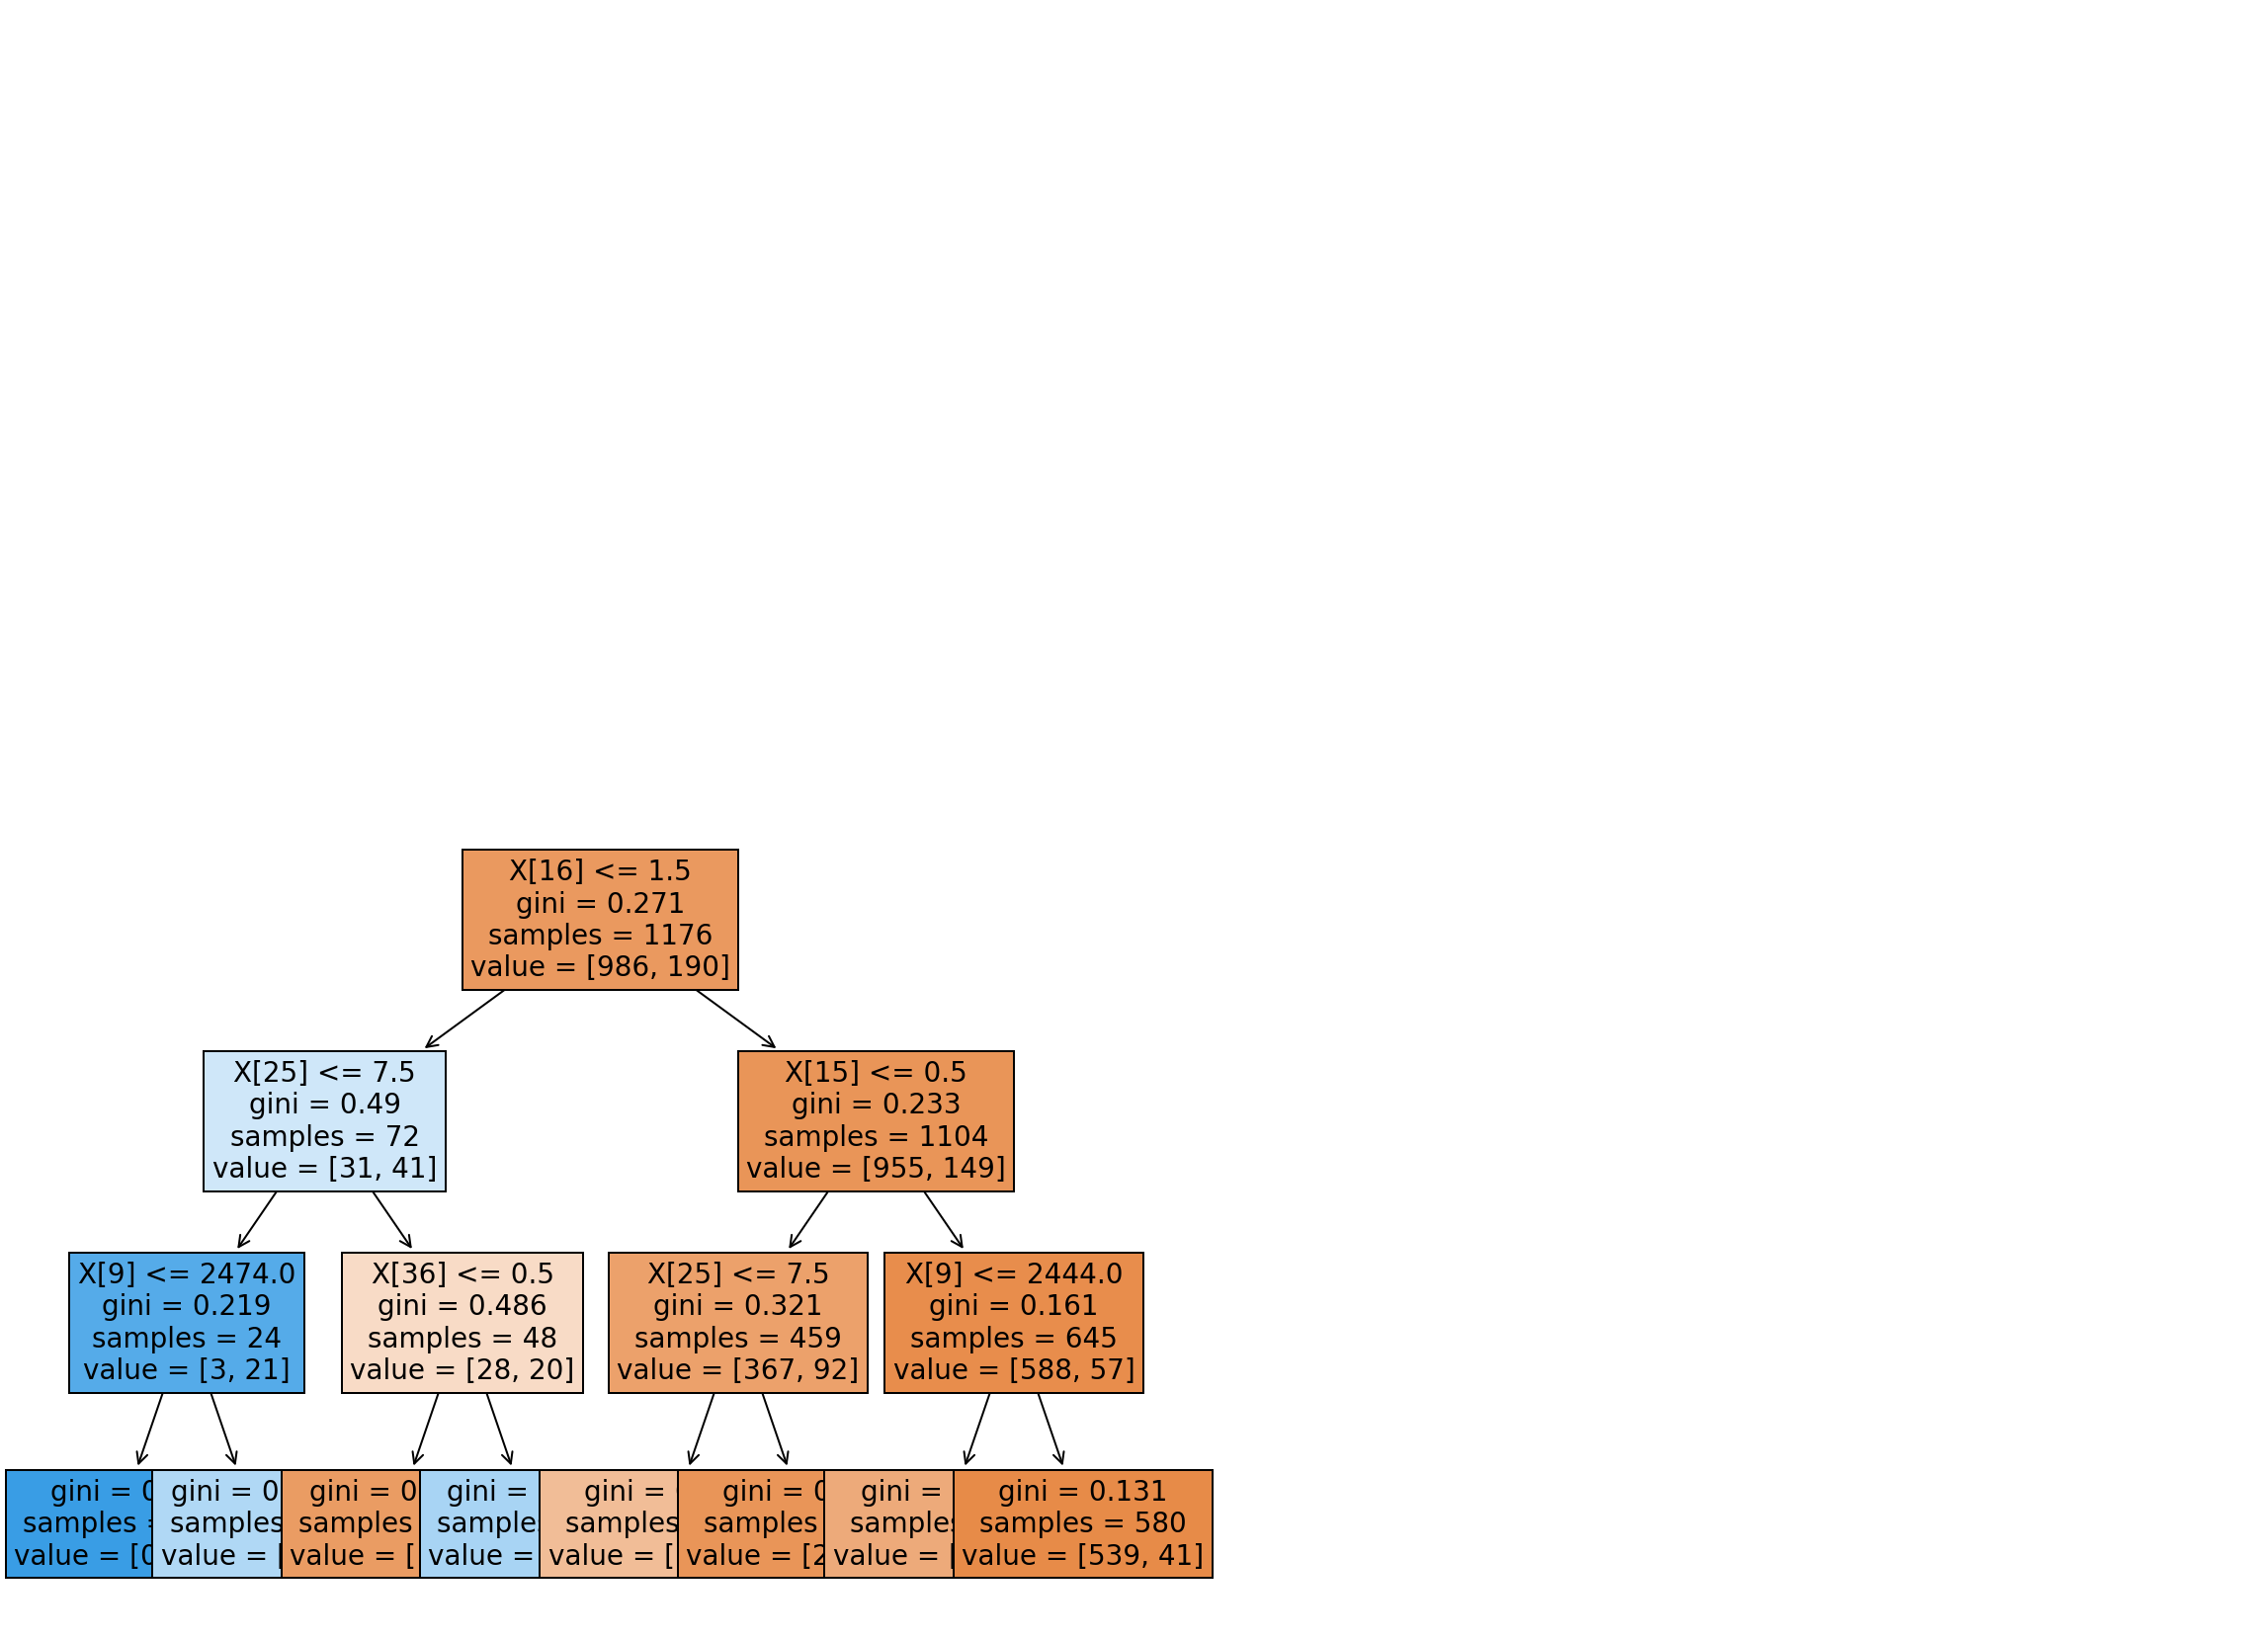

In [103]:
plt.figure(figsize=(20, 15))

plot_tree(dt, filled=True)
plt.show()

From the tree plots, we found the fetures StockOptionLevel, Relationship Satisfaction and ManagingRole are the main factors which don't fit to the previous analysis. The tree still doesn't make much sense.

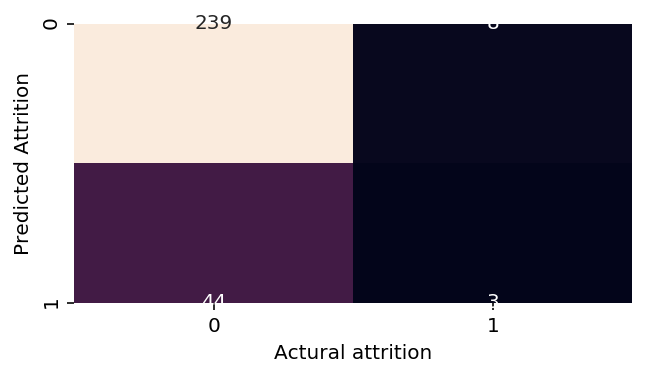

In [116]:
y_dtpred = dt.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_dtpred)

plt.figure(figsize=(5, 20))
sns.heatmap(confusion, square=True, annot=True, fmt='d', cbar=False)
           # xticklabels=digits.target_names,
            #yticklabels=digits.target_names)
plt.xlabel('Actural attrition')
plt.ylabel('Predicted Attrition');

239 +3 correct predictions and 44+6 incorrect predictions.

In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_dtpred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       247
           1       0.27      0.06      0.10        47

    accuracy                           0.82       294
   macro avg       0.56      0.52      0.50       294
weighted avg       0.75      0.82      0.77       294



From the cofusion matrix, we found the model predicting 1 has 0.06 recall and 11% F1-score. Thus, we need more models to imporve the predictions

#### Build the random forest model¶

In [118]:
rf = RandomForestClassifier(random_state = 5, n_estimators = 100,
                                    criterion = 'entropy')
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [119]:
y_rfpred = rf.predict(x_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_rfpred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.42      0.11      0.17        47

    accuracy                           0.83       294
   macro avg       0.63      0.54      0.54       294
weighted avg       0.78      0.83      0.79       294



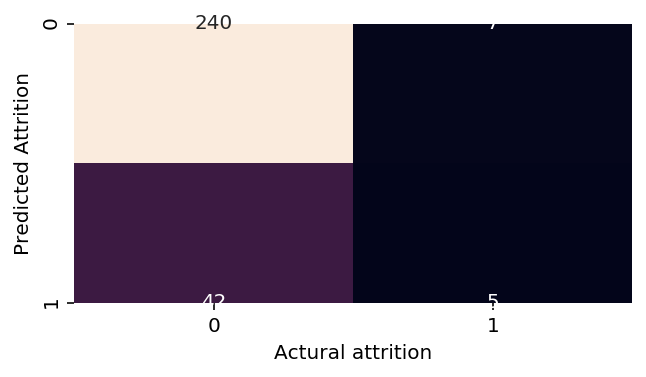

In [120]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_rfpred)

plt.figure(figsize=(5, 20))
sns.heatmap(confusion, square=True, annot=True, fmt='d', cbar=False)
           # xticklabels=digits.target_names,
            #yticklabels=digits.target_names)
plt.xlabel('Actural attrition')
plt.ylabel('Predicted Attrition');

240 + 5 correct predictions and 42+1 incorrect predictions. The result didn't improve much on predicting the attrition.

In [134]:


index = ['MonthlyIncome', 'TotalWorkingYears', 'Age', 'YearsAtCompany', 'JobLevel', 'YearsWithCurrManager', 'TotalSatisfaction', 'StockOptionLevel', 'MaritalStatus_Single', 'YearsInCurrentRole', 'EnvironmentSatisfaction', 'BusinessTravel_Travel_Frequently', 'JobInvolvement', 'MonthlyRate', 'DistanceFromHome', 'ManagingRole', 'DailyRate', 'NumCompaniesWorked', 'JobSatisfaction', 'HourlyRate']
x2_train = x_train.loc[:,index]
x2_test = x_test.loc[:,index]

rf2 = RandomForestClassifier(random_state = 5, n_estimators = 100,
                                    criterion = 'entropy')
rf2.fit(x2_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

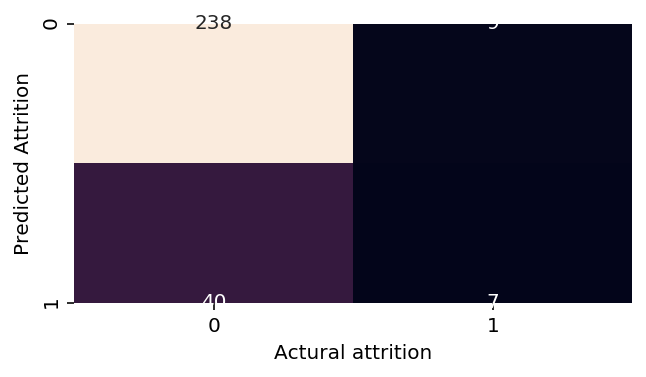

In [135]:
y_rf2pred = rf2.predict(x2_test)

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_rf2pred)

plt.figure(figsize=(5, 20))
sns.heatmap(confusion, square=True, annot=True, fmt='d', cbar=False)
           # xticklabels=digits.target_names,
            #yticklabels=digits.target_names)
plt.xlabel('Actural attrition')
plt.ylabel('Predicted Attrition');

In [136]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_rf2pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       247
           1       0.44      0.15      0.22        47

    accuracy                           0.83       294
   macro avg       0.65      0.56      0.56       294
weighted avg       0.79      0.83      0.80       294



238 + 7 correct predictions and 40+5 incorrect predictions. We have two more correct predictions on the predicting the result of 'Yes'. Thus, more classfication models needed to be explored in the future analysis.